<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/fifa/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** FIFA
  
Last update: August, 2025

In [ ]:
# !pip install --upgrade ydata-profiling
# python -m ipykernel install --user --name=ciencia_datos --display-name "Python (ciencia_datos)"
#ciencia_datos\Scripts\activate 
#C:\Users\jarat\OneDrive\Documentos\backup\MAESTRIA\MINE\2025_2\ciencia_datos\tutorial_1\ciencia_datos\Scripts\activate.bat

In [1]:
# Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

In [2]:
# Panadas configuration to extend the number of rows and columns to visualize by default
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
# Suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format

### Load the data

In [4]:
# Loading the CSV file as a dataframe
fifa_df = pd.read_csv('./data/fifa.csv')

C:\Users\jarat\AppData\Local\Temp\ipykernel_6684\3787290217.py:2: DtypeWarning: Columns (22,34) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_df = pd.read_csv('./data/fifa.csv')


In [5]:
# Showing the dataframe dimensions
fifa_df.shape

(17981, 74)

In [6]:
# Showing the column data types
fifa_df.dtypes

Name                    object
Age                      int64
Photo                   object
Nationality             object
Flag                    object
Overall                  int64
Potential                int64
Club                    object
Club Logo               object
Value                   object
Wage                    object
Special                  int64
Acceleration            object
Aggression              object
Agility                 object
Balance                 object
Ball control            object
Composure               object
Crossing                object
Curve                   object
Dribbling               object
Finishing               object
Free kick accuracy      object
GK diving               object
GK handling             object
GK kicking              object
GK positioning          object
GK reflexes             object
Heading accuracy        object
Interceptions           object
Jumping                 object
Long passing            object
Long sho

In [7]:
# Showing the top 5 rows
fifa_df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.00,53.00,62.00,91.00,82.00,20801,89.00,61.00,53.00,82.00,62.00,91.00,89.00,92.00,91.00,66.00,ST LW,89.00,61.00,53.00,82.00,62.00,91.00,89.00,92.00,91.00,66.00,92.00
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.00,45.00,59.00,92.00,84.00,158023,92.00,57.00,45.00,84.00,59.00,92.00,90.00,88.00,91.00,62.00,RW,92.00,57.00,45.00,84.00,59.00,92.00,90.00,88.00,91.00,62.00,88.00
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.00,46.00,59.00,88.00,79.00,190871,88.00,59.00,46.00,79.00,59.00,88.00,87.00,84.00,89.00,64.00,LW,88.00,59.00,46.00,79.00,59.00,88.00,87.00,84.00,89.00,64.00,84.00
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.00,58.00,65.00,88.00,80.00,176580,87.00,64.00,58.00,80.00,65.00,88.00,85.00,88.00,87.00,68.00,ST,87.00,64.00,58.00,80.00,65.00,88.00,85.00,88.00,87.00,68.00,88.00
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Transform some columns

In [9]:
# Analyzing unique values for columns Value and Wage ---- Se unieron las columnas salario y valor del jugador. Se concatenaron primero y luego se sacaron 

print(fifa_df['Value'].values ) # valor del jugador. El .values convierte la columna en un arreglo de numpy
print( fifa_df['Wage'].values) # salario del jugador

print(fifa_df['Value'].values + fifa_df['Wage'].values) # concatenacion de los dos arreglos
print(type(fifa_df['Value'].values + fifa_df['Wage'].values)) #tipo de dato del resultado de la concatenacion: La concatenacion de arreglos de numpy es otro arreglo de numpy

set(''.join(fifa_df['Value'].values + fifa_df['Wage'].values))#caracteres unicos
print(type(set(''.join(fifa_df['Value'].values + fifa_df['Wage'].values)))) #tipo de dato del conjunto de caracteres unicos


print(set(''.join(fifa_df['Value'].values + fifa_df['Wage'].values)))#caracteres unicos



['€95.5M' '€105M' '€123M' ... '€60K' '€60K' '€50K']
['€565K' '€565K' '€280K' ... '€1K' '€1K' '€1K']
['€95.5M€565K' '€105M€565K' '€123M€280K' ... '€60K€1K' '€60K€1K' '€50K€1K']
<class 'numpy.ndarray'>
<class 'set'>
{'1', '0', '4', '5', '2', 'K', '.', '7', '9', '€', '6', 'M', '3', '8'}


In [11]:
# Transforming some columns to float based on thousand and million symbols

def money_str_to_float(x):
    x = x.replace('€', '')           # Remove the euro symbol
    if 'M' in x:                     # If the value has the million symbol 
        x = x.replace('M', '')       # Remove the symbol
        return float(x) * 1000000    # Cast the value to float and multiply it by 1'000.000
    elif 'K' in x:                   # If value has the thousand symbol
        x = x.replace('K', '')       # # Remove the symbol
        return float(x) * 1000       # Cast the value to float and multiply it by 1.000
    else:                            # If neither symbol is found
        return float(x)              # Only cast the value to float

fifa_df['Value'] = fifa_df['Value'].apply(money_str_to_float)
fifa_df['Wage'] = fifa_df['Wage'].apply(money_str_to_float)

In [12]:
fifa_df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.00,565000.00,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.00,53.00,62.00,91.00,82.00,20801,89.00,61.00,53.00,82.00,62.00,91.00,89.00,92.00,91.00,66.00,ST LW,89.00,61.00,53.00,82.00,62.00,91.00,89.00,92.00,91.00,66.00,92.00
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.00,565000.00,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.00,45.00,59.00,92.00,84.00,158023,92.00,57.00,45.00,84.00,59.00,92.00,90.00,88.00,91.00,62.00,RW,92.00,57.00,45.00,84.00,59.00,92.00,90.00,88.00,91.00,62.00,88.00
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.00,280000.00,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.00,46.00,59.00,88.00,79.00,190871,88.00,59.00,46.00,79.00,59.00,88.00,87.00,84.00,89.00,64.00,LW,88.00,59.00,46.00,79.00,59.00,88.00,87.00,84.00,89.00,64.00,84.00
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.00,510000.00,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.00,58.00,65.00,88.00,80.00,176580,87.00,64.00,58.00,80.00,65.00,88.00,85.00,88.00,87.00,68.00,ST,87.00,64.00,58.00,80.00,65.00,88.00,85.00,88.00,87.00,68.00,88.00
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.00,230000.00,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Explore the *Value* column

In [13]:
# Getting the mean Value for all players
fifa_df['Value'].mean()

2385389.5778877703

In [14]:
# Getting the median value for all players
fifa_df['Value'].median()

675000.0

In [17]:
# Getting the player with the highest value
max_value = fifa_df['Value'].max()
fifa_df.loc[fifa_df['Value'] == max_value]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.00,280000.00,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.00,46.00,59.00,88.00,79.00,190871,88.00,59.00,46.00,79.00,59.00,88.00,87.00,84.00,89.00,64.00,LW,88.00,59.00,46.00,79.00,59.00,88.00,87.00,84.00,89.00,64.00,84.00


In [18]:
# Getting the main statistics for the Value column
fifa_df['Value'].describe()

count       17981.00
mean      2385389.58
std       5353969.97
min             0.00
25%        300000.00
50%        675000.00
75%       2100000.00
max     123000000.00
Name: Value, dtype: float64

<p style="color: red;">Modify the code above to show percentiles 95 and 99</p>

In [22]:
fifa_df['Value'].describe(percentiles=[.25,.75,.95, .99])

count       17981.00
mean      2385389.58
std       5353969.97
min             0.00
25%        300000.00
50%        675000.00
75%       2100000.00
95%      10000000.00
99%      25000000.00
max     123000000.00
Name: Value, dtype: float64

In [24]:
# Computing skewness and kurtosis
print("Skewness:", fifa_df['Value'].skew())
print("Kurtosis:", fifa_df['Value'].kurtosis())

Skewness: 7.075476425393412
Kurtosis: 81.55198299182628


Una asimetria con valores superiores a 0 denota sesgo a la derecha, es decir una cola larga. Lo cual coincide con el valor maximo de 123 millones de euros del valor maximo que arrojó previamente. También se evidenvia que una media al lado derecho de la mediana también muestra este sesgo.

La curtosis superior a 3 indica que la distribución es leptocurtica, es decir picuda y colas pesadas. Mas no platicurtica o achatada con colas ligeras.

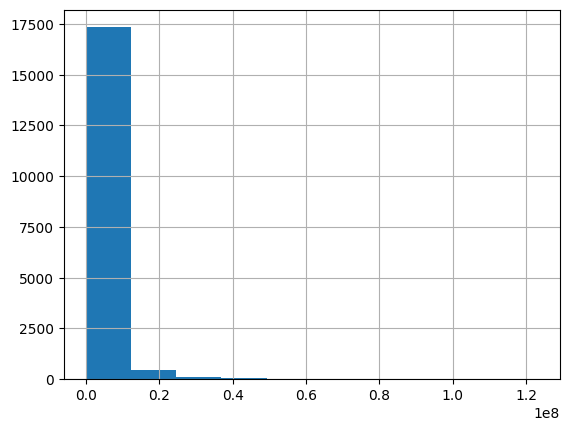

In [19]:
# Plotting the histogram for the column
fifa_df['Value'].hist()
plt.show()

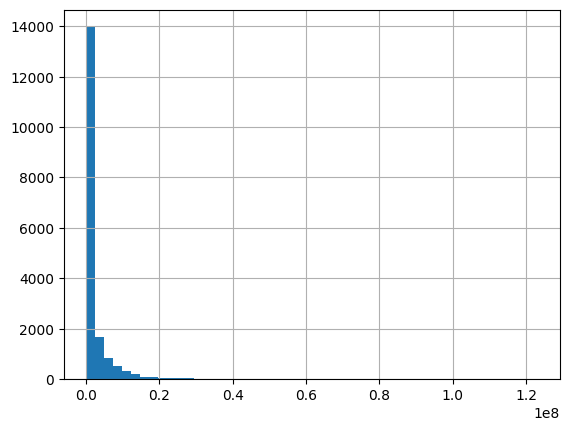

In [20]:
# Defining the number of bins and for better visualization
plt.figure()
fifa_df['Value'].hist(bins=50)
plt.show()

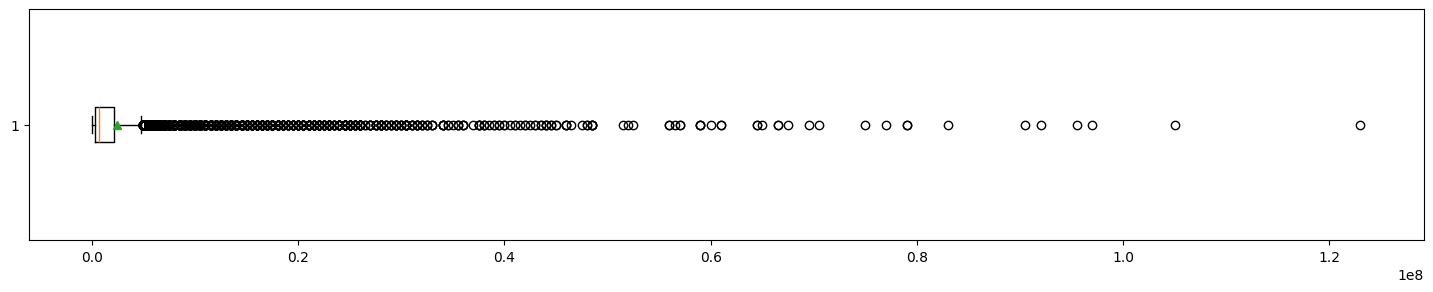

In [21]:
# Plotting distribution but using a boxplot
plt.figure(figsize=(18, 3))
plt.boxplot(fifa_df['Value'], showmeans=True, vert=False)
plt.show()

Nuevamente podemos identificar la Media al lado derecho de la mediana mostrando una asimetria con sesgo a la derecha lo que implica una concentración de valores a la izquierda. También se puede ver que existe un buen numero de atipicos. Se resalta también que los bigotes corresponden a los rangos intercuartilicos. 
(IQR = Q3-Q1)
limite inferior (Q1 - 1,5*IQR)
Limite superior (Q3 + 1,5*IQR)

In [ ]:
# Which are the most valuable players?
outlier_threshold = fifa_df['Value'].mean() + fifa_df['Value'].std() * 15  #Umbral para considerar un valor como atipico. si se usa con 15 me arroja los jugadores mas valiosos. 
print(outlier_threshold)
fifa_df[fifa_df['Value'] > outlier_threshold].sort_values(by='Value', ascending=False)

82694939.13341068


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.00,280000.00,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.00,46.00,59.00,88.00,79.00,190871,88.00,59.00,46.00,79.00,59.00,88.00,87.00,84.00,89.00,64.00,LW,88.00,59.00,46.00,79.00,59.00,88.00,87.00,84.00,89.00,64.00,84.00
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.00,565000.00,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.00,45.00,59.00,92.00,84.00,158023,92.00,57.00,45.00,84.00,59.00,92.00,90.00,88.00,91.00,62.00,RW,92.00,57.00,45.00,84.00,59.00,92.00,90.00,88.00,91.00,62.00,88.00
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.00,510000.00,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.00,58.00,65.00,88.00,80.00,176580,87.00,64.00,58.00,80.00,65.00,88.00,85.00,88.00,87.00,68.00,ST,87.00,64.00,58.00,80.00,65.00,88.00,85.00,88.00,87.00,68.00,88.00
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.00,565000.00,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.00,53.00,62.00,91.00,82.00,20801,89.00,61.00,53.00,82.00,62.00,91.00,89.00,92.00,91.00,66.00,ST LW,89.00,61.00,53.00,82.00,62.00,91.00,89.00,92.00,91.00,66.00,92.00
5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,92000000.00,355000.00,2143,79,80,78,80,89,87,62,77,85,91,84,15,6,12,8,10,85,39,84,65,83,25,81,91,91,83,88,19,83,79,42,84,78,87,84.00,57.00,62.00,87.00,78.00,188545,84.00,58.00,57.00,78.00,62.00,87.00,82.00,88.00,84.00,61.00,ST,84.00,58.00,57.00,78.00,62.00,87.00,82.00,88.00,84.00,61.00,88.00
7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,90500000.00,295000.00,2096,93,54,93,91,92,87,80,82,93,83,79,11,12,6,8,8,57,41,59,81,82,25,86,85,85,86,79,22,87,79,27,65,86,79,88.00,47.00,61.00,87.00,81.00,183277,88.00,59.00,47.00,81.00,61.00,87.00,87.00,82.00,88.00,64.00,LW,88.00,59.00,47.00,81.00,61.00,87.00,87.00,82.00,88.00,64.00,82.00
11,K. De Bruyne,26,https://cdn.sofifa.org/48/18/players/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,92,Manchester City,https://cdn.sofifa.org/24/18/teams/10.png,83000000.00,285000.00,2162,76,68,80,75,87,84,90,83,85,83,83,15,13,5,10,13,53,56,65,84,86,30,77,84,88,90,85,40,75,87,51,73,90,82,86.00,57.00,70.00,85.00,84.00,192985,86.00,66.00,57.00,84.00,70.00,85.00,85.00,81.00,85.00,71.00,RM CM CAM,86.00,66.00,57.00,84.00,70.00,85.00,85.00,81.00,85.00,71.00,81.00


Si filtramos los outliers con la regla basada en Media y desviación estandar en donde se basan en distribuciones normales para la limpieza con la siguiente ecuación

[media - k*desviacion , media + k*desviacion ]
y usamos una k = 15, se estarian quitando solo 7 valores que superan 15 desviaciones estandar la media. Aqui vemos que el valor mas pequeño depurado es de 83 millones de euros. Y nuestros datos mostraban que el 95% de los datos estaban inferiores a 10millones.

Limpiando con k=1.5 se entienden como atipicos 876 datos en donde el valor mas bajo depurado es de 10.5millones.

Sin embargo, es bueno resaltar que depurar atipicos usando el metodo de media y desviación estandar no aplica del todo bien para distribuciones asimetricas y para este caso puntual de estudiar jugadores de futbol , es mejor usar otro metodo para no perder jugadores importantes para el analisis que hacen la cola de la distribución pesada y estarian siendo eliminados en este metodo.

In [46]:
# Using the method based on quartiles to select outliers
iqr = (fifa_df['Value'].quantile(.75) - fifa_df['Value'].quantile(.25))
outlier_threshold = fifa_df['Value'].quantile(.75) + iqr * 45
print(outlier_threshold)
fifa_df[fifa_df['Value'] > outlier_threshold]


83100000.0


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.00,565000.00,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.00,53.00,62.00,91.00,82.00,20801,89.00,61.00,53.00,82.00,62.00,91.00,89.00,92.00,91.00,66.00,ST LW,89.00,61.00,53.00,82.00,62.00,91.00,89.00,92.00,91.00,66.00,92.00
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.00,565000.00,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.00,45.00,59.00,92.00,84.00,158023,92.00,57.00,45.00,84.00,59.00,92.00,90.00,88.00,91.00,62.00,RW,92.00,57.00,45.00,84.00,59.00,92.00,90.00,88.00,91.00,62.00,88.00
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.00,280000.00,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.00,46.00,59.00,88.00,79.00,190871,88.00,59.00,46.00,79.00,59.00,88.00,87.00,84.00,89.00,64.00,LW,88.00,59.00,46.00,79.00,59.00,88.00,87.00,84.00,89.00,64.00,84.00
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.00,510000.00,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.00,58.00,65.00,88.00,80.00,176580,87.00,64.00,58.00,80.00,65.00,88.00,85.00,88.00,87.00,68.00,ST,87.00,64.00,58.00,80.00,65.00,88.00,85.00,88.00,87.00,68.00,88.00
5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,92000000.00,355000.00,2143,79,80,78,80,89,87,62,77,85,91,84,15,6,12,8,10,85,39,84,65,83,25,81,91,91,83,88,19,83,79,42,84,78,87,84.00,57.00,62.00,87.00,78.00,188545,84.00,58.00,57.00,78.00,62.00,87.00,82.00,88.00,84.00,61.00,ST,84.00,58.00,57.00,78.00,62.00,87.00,82.00,88.00,84.00,61.00,88.00
7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,90500000.00,295000.00,2096,93,54,93,91,92,87,80,82,93,83,79,11,12,6,8,8,57,41,59,81,82,25,86,85,85,86,79,22,87,79,27,65,86,79,88.00,47.00,61.00,87.00,81.00,183277,88.00,59.00,47.00,81.00,61.00,87.00,87.00,82.00,88.00,64.00,LW,88.00,59.00,47.00,81.00,61.00,87.00,87.00,82.00,88.00,64.00,82.00


Con la detección de outliers a partir de los rangos intercuartilicos se quitan 6 datos asociados a  valores superiores a 83100000


### Explore the *Preferred Positions* column

In [47]:
fifa_df['Preferred Positions'].unique()

array(['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ',
       'RM CM CAM ', 'RM LW ST LM ', 'ST CAM ', 'LW RW ST ',
       'CDM CAM CM ', 'RW CAM ', 'RW RM ', 'CM CDM ', 'LM RM CAM ', 'LB ',
       'CM ', 'LM CM CAM ', 'LM CM ', 'LM RM CAM CM ', 'CM CB LB ',
       'LM LB ', 'ST CAM RW CF ', 'CAM LW ', 'LW ST LM ', 'CAM CM ',
       'CDM CB ', 'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'RM LM ', 'CDM ',
       'LM RW RM ', 'LB RB CB ', 'LW RW ', 'LW LM RM CAM ', 'RM ',
       'LM CF CAM ', 'RB ', 'LM CAM LW ', 'LM RM CM ', 'CAM LM ',
       'CAM RM RW ', 'RM CAM ', 'CAM LW RW ', 'LM ', 'LM CAM ',
       'CAM CF ST ', 'CM CB CDM ', 'RW ST ', 'RW LW CM ', 'CF CAM ',
       'LW CM ', 'RWB RB ', 'CAM ', 'ST CF ', 'LM ST ', 'CM CAM ',
       'CF ST ', 'CB RB ', 'CF CM CAM ', 'LM CAM RW LW ', 'LM RM ',
       'LM RW LW ', 'LM CF RM ', 'CAM LW CM ', 'ST LM ', 'LM ST RM ',
       'RM RW ', 'RM CM ', 'RB CB ', 'CM RW RB ', 'LM RM RW ', 'RW LW ',
       'CM CDM CB ', 'LB CB ', 'ST RM LM ', 'C

In [ ]:
# How many preferred positions the players have?

def count_pref_positions(x):
    positions = x.strip().split(' ')    # strip elimina espacios al principio y al final. Split the text by space: hace una lista de objetos, entendiendo un objeto como lo separado por espacios
    return len(positions)               # Count the number of positions and return the value: cuenta el numero de posiciones de la lista

fifa_df['Preferred Positions'].apply(count_pref_positions).value_counts(dropna=False, normalize=True)

Preferred Positions
1   0.54
2   0.33
3   0.11
4   0.02
Name: proportion, dtype: float64

La mayoria de los futbolistas prefiere una posición. Se sacó la frecuencia relativa con normalize=true

In [50]:
# Selecting the preferred position with the highest score

def get_pref_position(row):
    pref_positions = row['Preferred Positions'].strip().split(' ')    # Split the text by space
    if pref_positions[0] == "GK":                                     # Handle the special case for GKs
        return "GK"
    scores = np.array([row[p] for p in pref_positions])               # Get the the scores for each preferred position
    i_max = np.argmax(scores)                                         # Get the index for the highest score
    return pref_positions[i_max]                                      # Locate the position using its index and return it

fifa_df['Preferred Position'] = fifa_df.apply(get_pref_position, axis=1)

In [51]:
# Calculating the absolute frecuency of the preferred position
pref_positions_abs_frec = fifa_df['Preferred Position'].value_counts(dropna=False)
pref_positions_abs_frec

Preferred Position
CB     3306
ST     2456
GK     2029
CM     1559
CDM    1441
LB     1307
CAM    1279
RM     1171
LM     1122
RB     1063
LW      445
RW      440
CF      137
LWB     124
RWB     102
Name: count, dtype: int64

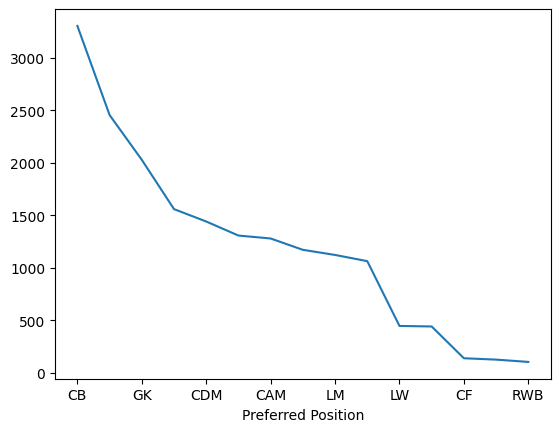

In [52]:
# Plotting preferred position frecuency
# WARNING: line chart assumes continuity. It is a better choice when dealing with continuous variables (e.g. time series)
pref_positions_abs_frec.plot()
plt.show()

<p style="color: red;">Use a bar chart to better visualize the preferred position frecuency</p>

### Explore the relationship between *Age* and *Value*

In [ ]:
# Plotting a scatter plot to visualize two quantitative variables
plt.figure(figsize=(13, 7))
plt.scatter(fifa_df['Age'], fifa_df['Value'], alpha=0.5)
plt.title('Age vs. Value')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

In [ ]:
# What is the (linear) correlation coefficient?
fifa_df[['Age', 'Value']].corr()

In [ ]:
# What is the (monotonic) correlation coefficient?
fifa_df[['Age', 'Value']].corr('spearman')

### Explore the relationship between *Overall* and *Value*

In [ ]:
plt.figure(figsize=(13, 7))
plt.scatter(fifa_df['Overall'], fifa_df['Value'], alpha=0.5, color='orange')
plt.title('Overall vs. Value')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.show()

In [ ]:
# What is the (linear) correlation coefficient?
fifa_df[['Overall', 'Value']].corr()

In [ ]:
# What is the (monotonic) correlation coefficient?
fifa_df[['Overall', 'Value']].corr('spearman')

<p style="color: red;">Why both methods give different correlation coefficients for the same pair of variables?</p>

### Compare by *Club*

In [ ]:
# Plotting Wage by club
plt.figure(figsize=(13, 10))
sns.boxplot(
    data=fifa_df.loc[fifa_df['Club'].isin(['Real Madrid CF', 'FC Barcelona'])],
    x='Club',
    y='Wage',
    showmeans=True
)
plt.show()

In [ ]:
# Plotting Wage by club
plt.figure(figsize=(13, 10))
sns.boxplot(
    data=fifa_df.loc[fifa_df['Club'].isin(['Independiente Santa Fe', 'CD Los Millionarios Bogota'])],
    x='Club',
    y='Wage',
    showmeans=True
)
plt.show()

<p style="color: red;">What are the main origins (Nationality) of the players in the top 3 teams with the most expensive squads (Value)? Hint: You need to group the data first.</p>

### Profiling the data

In [ ]:
profile = ProfileReport(fifa_df)

In [ ]:
# profile.to_notebook_iframe()

In [ ]:
# profile.to_file('report.html')

### Exporting clean date

In [ ]:
fifa_df.to_csv('./data/fifa_clean.csv', index=False)